# Introduction to PyTorch
PyTorch 소개 

## PyTorch Tensors

In [1]:
import torch

In [2]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [5]:
# 정수형 데이터 타입을 원하는 경우 기본값을 재정의 할 수 있다. 
i = torch.ones((5, 3), dtype = torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [9]:
# 학습 가중치를 무작위로 초기화 하는 것이 일반적이며, 종종 결과의 재현성을 위해 PRNG에 대한 특정 시드로 초기화 한다. 
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('랜덤 tensor 값 :')
print(r1)

r2 = torch.rand(2, 2)
print('\n다른 랜덤 tensor 값 :')
print(r2) # 새로운 2x2 행렬 값

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nr1과 일치 :')
print(r3) # 동일한 시드값으로 인해 r1 값이 반복되어 행렬값으로 나온다. 

랜덤 tensor 값 :
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

다른 랜덤 tensor 값 :
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

r1과 일치 :
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [10]:
# PyTorch tensor는 산술 연산을 직관적으로 수행한다. 유사한 shape의 tensor들을 더하거나, 곱하고 이외 연산도 가능하다. 
# 스칼라를 사용한 연산은 tensor에 분산된다. 
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # 모든 원소에 2를 곱한다. 
print(twos)

threes = ones + twos # shape이 비슷하기 때문에 더할 수 있다.
print(threes) # tensor의 원소별 더한 값이 결과로 나온다.
print(threes.shape) # 입력 tensor와 동일한 차원을 가지고 있다.

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# 런타임 오류를 발생시키려면 아래 줄의 주석을 해제한다.
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [11]:
r = (torch.rand(2, 2) - 0.5) * 2 # -1과 1 사이의 값을 가진다.
print('랜덤 행렬값, r :')
print(r)

# 일반적인 수학적 연산은 다음과 같이 지원된다. 
print('\nr의 절대값 :')
print(torch.abs(r))

# 삼각함수를 사용할 수 있다.
print('\nr의 역 사인 함수 :')
print(torch.asin(r))

# 행렬식 및 특이값 분해와 같은 선형 대수 연산을 사용할 수 있다.
print('\nr의 행렬식 :')
print(torch.det(r))
print('\nr의 특이값 분해 :')
print(torch.svd(r))

# 통계 및 집합 연산 등을 사용할 수 있다.
print('\nr의 평균 및 표준편차 :')
print(torch.std_mean(r))
print('\nr의 최대값:')
print(torch.max(r))

랜덤 행렬값, r :
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

r의 절대값 :
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])

r의 역 사인 함수 :
tensor([[ 1.4775, -0.2251],
        [ 0.3961, -0.7199]])

r의 행렬식 :
tensor(-0.5703)

r의 특이값 분해 :
torch.return_types.svd(
U=tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]),
S=tensor([1.1793, 0.4836]),
V=tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]]))

r의 평균 및 표준편차 :
(tensor(0.7217), tensor(0.1247))

r의 최대값:
tensor(0.9956)


## PyTorch Models

In [12]:
import torch # PyTorch 모든 모듈 가져오기
import torch.nn as nn # torch.nn.Module의 경우 PyTorch model의 부모 객체
import torch.nn.functional as F # 활성화 함수 모듈 가져오기

<img src = "https://tutorials.pytorch.kr/_images/mnist.png">

LeNet-5의 다이어그램은 초기 합성곱 신경망 중 하나이자 딥 러닝에서 폭발적인 인기를 일으킨 요인중 하나이다. <br>
손으로 쓴 숫자 이미지(MNIST 데이터셋)를 읽고 이미지에 어떤 숫자가 표현되었는지 정확하게 분류하기 위해 제작되었다.

**LeNet-5 동작 방식**
- 계층 C1은 합성곱 계층이다. 즉, 입력 이미지에서 학습 중에 배웠던 특징을 검색한다. 이미지에서 학습된 각 특징을 위치에 대한 출력 맵을 보여준다. 이 “활성화 맵” 으로 S2 계층에서 다운샘플링된다.
- 계층 C3는 다른 합성곱 계층으로, 이 시점은 특징들의 조합 을 위해 C1 활성화 맵 검색한다. 또한, 계층 S4에서 다운샘플링된 이러한 특징 조합의 spatial locations을 제공한다.
- 마지막으로, 완전 연결 계층(fully-connected layers)인 F5, F6, OUTPUT은 최종 활성화 맵을 가져와 십진수를 표현하는 10개의 bin 중 하나로 분류 하는 분류기이다.

In [13]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 입력 이미지 채널, 6개의 output 채널, 5x5 정방 합성곱 커널을 사용
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 아핀 변환: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5x5 이미지 차원
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 최대 풀링은 (2, 2) 윈도우 크기를 사용한다.
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 크기가 정방 사이즈인 경우, 단일 숫자만 지정할 수 있다.
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # 크기는 배치 차원을 제외한 모든 차원을 가져온다.
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

코드를 살펴보면 구조적으로 위 다이어그램과 유사점을 발견할 수 있다.

다음은 일반적인 PyTorch 모델의 구조를 보여준다. 
- 모듈은 중첩될 수 있으며 torch.nn.Module 에서 상속된다. 실제로, Conv2d 와 Linear 계층 클래스도 torch.nn.Module 에서 상속된다.
- 모델은 계층을 인스턴스화하고 필요한 데이터 아티팩트를 로드하는 \__init__() 함수를 가지고 있다. (예를들면 NLP 모델은 어휘를 불러올 수 있다.)
- 모델은 forward() 함수를 가지고 있다. 여기서 실제 계산이 수행된다. 입력은 네트워크 계층 및 다양한 기능들을 통과시켜 결과를 생성한다.
- 그 외에는 다른 파이썬 클래스처럼 모델 클래스를 구성할 수 있다. Python 클래스, 모델의 계산을 지원하는 데 필요한 속성 및 메서드를 추가한다.

만든 오브젝트를 인스턴스화하고 샘플 입력을 통해 실행한다.

In [15]:
net = LeNet()
print(net) 

input = torch.rand(1, 1, 32, 32) # 32x32 크기의 1채널의 흑백 이미지를 만든다.
print('\n이미지 배치 shape :')
print(input.shape)

output = net(input) # 객체로부터 직접 forward() 함수를 호출하지 않는다.
print('\n : 결과 값')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

이미지 배치 shape :
torch.Size([1, 1, 32, 32])

 : 결과 값
tensor([[-0.0611,  0.0157, -0.0386, -0.0371, -0.0438,  0.0625,  0.0630,  0.0102,
         -0.0655, -0.0349]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


- 첫째, LeNet 클래스를 인스턴스화하고 net 객체를 출력한다. torch.nn.Module 의 하위 클래스는 생성된 레이어의 모양과 파라미터를 알려준다. 모델의 처리 결과를 얻으려는 경우, 모델의 편리한 기능을 제공할 수 있다. 
- 아래에서 1 채널과 32 x 32 이미지크기를 가진 더미 입력을 생성한다. 일반적으로 배치 이미지를읽어들이고,이미지와 같은 크기의 텐서로 변환한다.
- tensor 의 추가 차원인 batch 차원을 알아챘을 수 있다. PyTorch 모델은 데이터의 batch 에 작업한다고 가정한다. 예를들어 16개 이미지의 배치는 (1, 1, 32, 32) 모양을 가질 것이다. 이 샘플에서는 하나의 이미지만 사용하기 때문에 (1, 1, 32, 32) 모양을 가진 batch를 만든다.
- 모델을 함수처럼 net(input)를 호출하여 추론을 요청한다. 호출의 결과는 입력 이미지가 특정 숫자를 나타내는 모델의 신뢰도를 나타낸다. (모델의 인스턴스는 아직 아무것도 학습하지 않았기 때문에 출력에서 좋은 결과를 기대해서는 안 된다.) output 결과를 확인해보면 batch 차원을 가지고 있다는 것을 알 수 있는데, 크기는 항상 입력 batch 차원과 일치해야 한다. 만약 16개의 인스턴스로 이루어진 입력으로 모델을 통과했다면 output 는 (16, 10)의 형태를 가지고 있다.

## Datasets 및 Dataloaders

TorchVision에서 바로 다운로드할 수 있는 오픈 데이터셋 중 하나를 사용하여 모델을 통해 이미지를 변환하는 방법, DataLoader를 사용하여 모델에 데이터 배치를 제공하는 방법을 학습한다. 

In [17]:
#%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

우선 들어오는 이미지를 Pytorch tensor로 변환한다. <br>
여기서는 입력에 대한 두 가지 변환을 지정한다. <br>

transforms.ToTensor()는 Pillow 패키지를 사용하여 불러온 이미지를 PyTorch tensor 형태로 변환한다. <br>
transforms.Normalize() 는 tensor의 평균이 0이고 표준 편차가 0.5가 되도록 tensor의 값을 조정한다. 대부분의 활성화 함수는 약 x=0에 강한 기울기 값을 가지고 있어 데이터를 중앙으로 집중화하여 학습 속도를 높일 수 있다. <br>
transforms 는 cropping, centering, rotation, reflection를 포함하여 더 많은 변환이 가능하다. <br>

다음으로 CIFAR10 데이터셋의 인스턴스를 만든다. CIFAR10 데이터셋은 동물(새, 고양이, 사슴, 개, 개구리, 말) 6종과 차량(비행기, 자동차, 배, 트럭) 4종의 클래스로 이루어진 데이터셋이다.

In [18]:
trainset = torchvision.datasets.CIFAR10(root = './data', train = True,
                                        download = True, transform = transform)

100%|████████████████████████| 170498071/170498071 [00:22<00:00, 7668949.79it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


PyTorch에서 데이터셋 객체를 만드는 예제이다. <br>
다운로드 가능한 데이터셋 (CIFAR-10과 같은)는 torch.utils.data.Dataset의 하위 클래스이다. <br>
PyTorch의 Dataset 클래스에는 TorchVision, Torchtext 및 TorchAudio 등 다운로드 가능한 데이터셋 뿐 아니라 레이블된 이미지의 폴더를 읽는 torchvision.datasets.ImageFolder 와 같은 유틸리티 데이터셋 클래스가 포함된다. 또한, Dataset 의 하위 클래스를 직접 만들 수 있다. <br>

**데이터셋을 인스턴스화할 때 몇 가지 파라미터를 선언해야 한다.**

- 데이터를 저장하려는 파일 시스템 경로이다.
- 데이터셋을 학습에 사용하는지 여부를 확인하여 대부분의 데이터셋은 학습 및 테스트 데이터셋으로 분할된다.
- 데이터셋을 다운로드할지에 대한 여부를 확인한다.
- 데이터에 적용하려는 변환 객체를 넣어준다.
- 데이터셋 다운로드가 끝나면 ``DataLoader``에 사용할 수 있다.

In [19]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4,
                                          shuffle = True, num_workers = 2)

Dataset 하위 클래스는 데이터 접근에 대한 클래스를 포함하며, 해당 서브 클래스가 제공하는 데이터 유형에 특화되어 있다. <br>
DataLoader 는 데이터에 대해 아무것도 알지 못하지만 Dataset 이 제공하는 입력 tensor를 사용자가 지정한 파라미터로 구성한다. 

  cat truck  deer truck


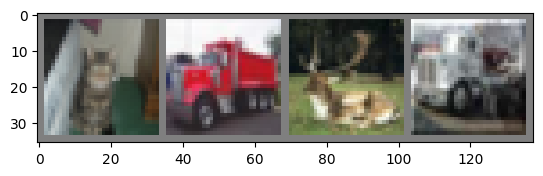

In [20]:
# 위 예제에서 DataLoader 에서에서 무작위 추출( shuffle=True )한 4개의 batch 이미지를 trainset 에서 추출하고 disk에서 데이터를 로드하기 위해 2개의 workers를 spin up 했다.
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # 역정규화
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 무작위로 학습 이미지 추출하기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# labels 출력하기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## PyTorch 모델 학습

In [21]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# 첫째로, 학습 및 테스트 데이터셋이 필요하다.
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root = './data', train = True,
                                        download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4,
                                          shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './data', train = False,
                                       download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4,
                                         shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  dog horse truck   dog


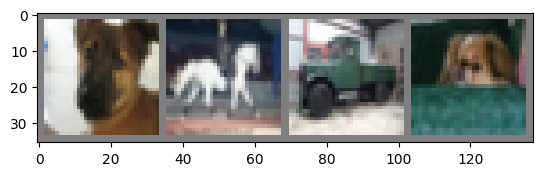

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 아래 함수는 이미지를 시각화하여 보여주는 함수이다. 
def imshow(img):
    img = img / 2 + 0.5     # 역정규화
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# 무작위로 학습 이미지를 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 시각화하기
imshow(torchvision.utils.make_grid(images))
# 정답 label 출력하기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [25]:
# 모델 학습 
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [26]:
# 학습에 필요한 손실 함수 및 최적화 방법
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

손실 함수(loss function)는 데이터 기반으로 모델이 예측한 정답 값이 얼마나 차이가 나는지를 표현하는 지표이다. <br>
Cross-entropy 손실 함수는 일반적인 분류 모델의 전형적인 손실 함수이다. <br>

optimizer는 학습의 필수요소이다. <br>
아래 예제에서 간단한 최적화 알고리즘인 stochastic gradient descent를 구현한다. <br>
SGD 알고리짐은 학습 속도인 (lr) 및 momentum 과 같은 매개 변수 외에도 모델의 모든 학습 가중치 값인 net.parameters()를 전달하는데, 이 함수는 최적화를 위해 파라미터를 조정한다.

In [27]:
for epoch in range(2):  # 데이터셋을 여러 번 반복 학습한다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 데이터를 통해 이미지와 정답값을 받는다.
        inputs, labels = data

        # 초기 기울기 파라미터를 0으로 설정한다.
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # epoch 및 loss 값을 출력한다. 
        running_loss += loss.item()
        if i % 2000 == 1999:    # 2000 mini-batches 마다 값을 출력한다. 
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.241
[1,  4000] loss: 1.877
[1,  6000] loss: 1.672
[1,  8000] loss: 1.571
[1, 10000] loss: 1.514
[1, 12000] loss: 1.460
[2,  2000] loss: 1.398
[2,  4000] loss: 1.372
[2,  6000] loss: 1.342
[2,  8000] loss: 1.334
[2, 10000] loss: 1.290
[2, 12000] loss: 1.285
Finished Training


- 1번째 라인 : 이 예제에서 학습 에폭 2번만 반복한다. 즉, 학습 데이터셋을 두 번 모델에 통과시킨다. 각 패스에는 iterates over the training data
- 4번째 라인 : 내부 루프가 있어 변환된 입력 이미지의 batch와 올바른 레이블을 제공한다.
- 9번째 라인 : 기울기 값 초기화은 중요한 단계이다. 기울기는 batch에 걸쳐 누적된다. 모든 batch에 대해 기울기 값을 재설정하지 않으면 기울기 값이 계속 누적되어 잘못된 기울기 값을 제공하여 학습이 불가능하다.
- 12번째 라인 : batch 데이터를 모델에게 예측을 요청한다. 다음 13번째라인에서 모델의 결과 값과 정답 값 차이인 손실값을 계산한다.
- 14번째 라인 : backward() 를 통해 모델의 학습 기울기를 계산한다.
- 15번째 라인 : 학습 단계의 최적화를 수행하는데 backward()를 통해 손실 값을 줄일 수 있는 방향으로 학습 가중치들을 조정한다.
루프의 나머지 부분은 epoch 횟수, 학습 루프를 통해 수집된 손실 값을 출력한다. <br>

손실 값은 단조롭게 감소하며, 이는 모델이 훈련 데이터셋에서 성능을 계속 향상시키고 있음을 보여준다. <br>
마지막 단계로 모델이 단순하게 학습 데이터셋을 “기억” 하는 것이 아니라 실제로 일반화 학습을 잘 수행하고 있는 확인해야 한다. <br>
이를 과적합 이라 부르며 일반적으로 데이터셋이 너무 작거나, 모델이 데이터셋 을 올바르게 모델링하는 데 필요한 것보다 더 많은 학습 파라미터 변수를 가지고 있음을 보여준다. <br>
위와 같이 데이터셋이 학습 및 테스트 데이터셋으로 분할되는 이유이다. 모델의 일반성을 테스트하기 위해 학습되지 않은 데이터에 대해 예측하도록 요청한다. 

In [28]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('10000개 테스트 이미지에서 모델 정확도 : %d %%' % (
    100 * correct / total))

10000개 테스트 이미지에서 모델 정확도 : 53 %
